#### Prepared for Gabor's Data Analysis

### Data Analysis for Business, Economics, and Policy
by Gabor Bekes and  Gabor Kezdi
 
Cambridge University Press 2021

**[gabors-data-analysis.com ](https://gabors-data-analysis.com/)**

 License: Free to share, modify and use for educational purposes. 
 Not to be used for commercial purposes.

### Chapter 08
**CH08B How is life expectancy related to the average income of a country?**

using the worldbank-lifeexpectancy dataset

version 1.0 2021-05-05

In [1]:
import os
import sys
import warnings

import numpy as np
import pandas as pd
import matplotlib.font_manager
from mizani.transforms import log_trans
from mizani.formatters import percent_format
from mizani.formatters import log_format
from plotnine import *
from datetime import datetime
from scipy.stats import norm
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter, FuncFormatter


warnings.filterwarnings("ignore")


In [2]:
# Current script folder
current_path = os.getcwd()
dirname = current_path.split("da_case_studies")[0]

# location folders
data_in = dirname + "da_data_repo/worldbank-lifeexpectancy/clean/"
data_out = dirname + "da_case_studies/ch08-life-expectancy-income/"
output = dirname + "da_case_studies/ch08-life-expectancy-income/output/"
func = dirname + "da_case_studies/ch00-tech-prep/"
sys.path.append(func)


In [3]:
# Import the prewritten helper functions
import py_helper_functions as da
sns.set_theme(rc=da.da_theme, palette=da.color)


Read clean data

In [4]:
xc = pd.read_csv(data_in + "worldbank-lifeexpectancy.csv")
#xc = pd.read_csv("https://osf.io/download/sh9mu/")


In [5]:
xc

,year,countryname,countrycode,lifeexp,population,gdppc
0,1990,Albania,ALB,71.836,3.286542,4.458248
1,1990,Algeria,DZA,66.725,25.758869,10.297842
2,1990,Angola,AGO,41.696,11.848386,4.761230
3,1990,Antigua and Barbuda,ATG,71.351,0.062528,17.472946
4,1990,Argentina,ARG,71.565,32.618651,11.372823
...,...,...,...,...,...,...
5024,2017,Vietnam,VNM,76.454,94.596642,6.233485
5025,2017,West Bank and Gaza,PSE,73.646,4.454805,4.651724
5026,2017,"Yemen, Rep.",YEM,65.157,27.834821,2.404422
5027,2017,Zambia,ZMB,62.255,16.853688,3.717667


select year

In [6]:
xc = xc.loc[lambda x: x["year"] == 2017]

 GDP total, log

In [7]:
xc["gdptot"] = xc["gdppc"] * xc["population"]
xc["lngdppc"] = np.log(xc["gdppc"])
xc["lngdptot"] = np.log(xc["gdptot"])

In [8]:
xc.loc[:, ["lifeexp", "gdppc", "gdptot", "lngdppc", "lngdptot"]].describe()


,lifeexp,gdppc,gdptot,lngdppc,lngdptot
count,182.000000,182.000000,182.000000,182.000000,182.000000
mean,72.307650,19.227860,629.823545,2.371420,4.351424
std,7.648017,20.386738,2218.147072,1.182575,2.186134
min,52.214000,0.670777,0.231175,-0.399318,-1.464581
25%,66.829750,4.444143,22.788201,1.491582,3.126207
50%,73.914000,12.253987,74.441676,2.505850,4.309768
75%,77.402500,27.327675,352.111662,3.307899,5.863881
max,84.680488,113.262182,21148.059722,4.729705,9.959303


### Figure 8.3 The distribution of GDP per capita

(a) Histogram of GDP per capita

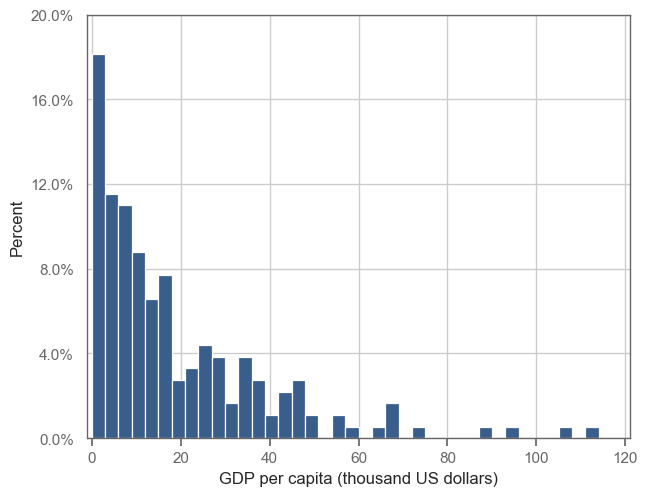

In [9]:
sns.histplot(
    xc['gdppc'], 
    binwidth=3, 
    binrange=(0, 120),  
    color=da.color[0], 
    stat="probability",
    alpha=1
)


plt.xlabel("GDP per capita (thousand US dollars)", fontsize=12)
plt.ylabel("Percent", fontsize=12)
plt.xlim(-1, 121)
plt.xticks(np.arange(0, 121, 20))
plt.ylim(0, 0.2)
plt.yticks(ticks=np.arange(0, 0.21, 0.04))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.show()

(b) Histogram of ln(GDP per capita)

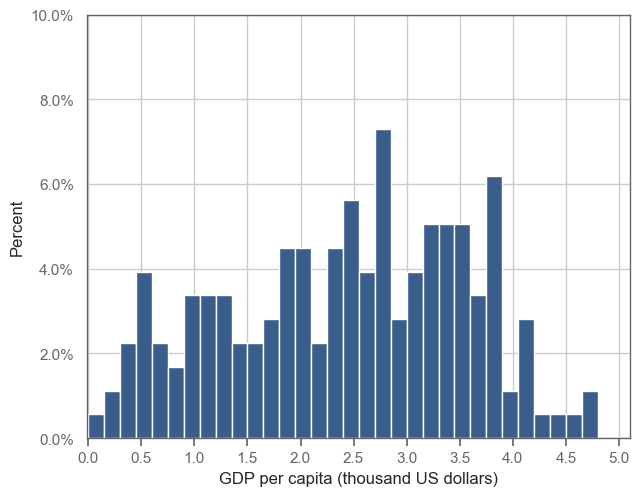

In [10]:
sns.histplot(
    xc['lngdppc'], 
    binwidth=0.15, 
    binrange=(0, 4.8),  
    color=da.color[0], 
    stat="probability",
    alpha=1
)


plt.xlabel("GDP per capita (thousand US dollars)", fontsize=12)
plt.ylabel("Percent", fontsize=12)
plt.xlim(-0.01, 5.1)
plt.xticks(np.arange(0, 5.1, 0.5))
plt.ylim(0, 0.1)
plt.yticks(ticks=np.arange(0, 0.11, 0.02))
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))

plt.show()

 LEVEL-LEVEL REGRESSION

In [11]:
reg3 = smf.ols(formula="lifeexp ~ gdppc", data=xc)
reg3.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeexp   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     142.4
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           1.47e-24
Time:                        12:10:26   Log-Likelihood:                -574.97
No. Observations:                 182   AIC:                             1154.
Df Residuals:                     180   BIC:                             1160.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     67.5137      0.585    115.478      0.000      66.360      68.667
gdppc          0.2493      0.021     11.933      0.000       0.208       0.291
==============================================================================
Omnibus:                       22.094   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.566
Skew:                          -0.925   Prob(JB):                     1.70e-06
Kurtosis:                       3.285   Cond. No.                         38.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Figure 8.4 Life expectancy and GDP per capita

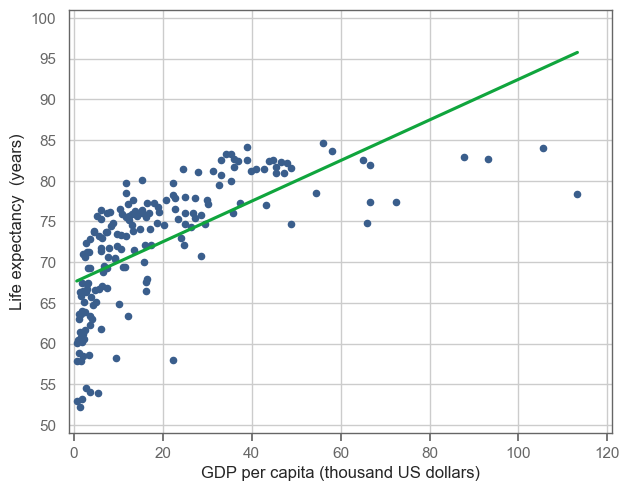

In [12]:
sns.regplot(data=xc, x="gdppc", y="lifeexp",ci = False,line_kws=dict(color=da.color[1]),scatter_kws=dict(alpha = 1,s = 20))

plt.xlabel("GDP per capita (thousand US dollars)", fontsize=12)
plt.ylabel("Life expectancy  (years)", fontsize=12)
plt.xlim(-1, 121)
plt.xticks(np.arange(0, 121, 20))  
plt.ylim(49, 101)
plt.yticks(np.arange(50, 101, 5))  


plt.show()

LOG GDP PER CAPITA

In [13]:
reg4 = smf.ols(formula="lifeexp ~ lngdppc", data=xc)
reg4.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeexp   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     382.8
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           2.00e-46
Time:                        12:10:27   Log-Likelihood:                -524.28
No. Observations:                 182   AIC:                             1053.
Df Residuals:                     180   BIC:                             1059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.6593      0.722     82.628      0.000      58.235      61.084
lngdppc        5.3336      0.273     19.565      0.000       4.796       5.872
==============================================================================
Omnibus:                       40.029   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.168
Skew:                          -1.116   Prob(JB):                     1.58e-15
Kurtosis:                       5.002   Cond. No.                         6.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Figure 8.5 Life expectancy and GDP per capita

(a) Life expectancy and ln(GDP per capita)

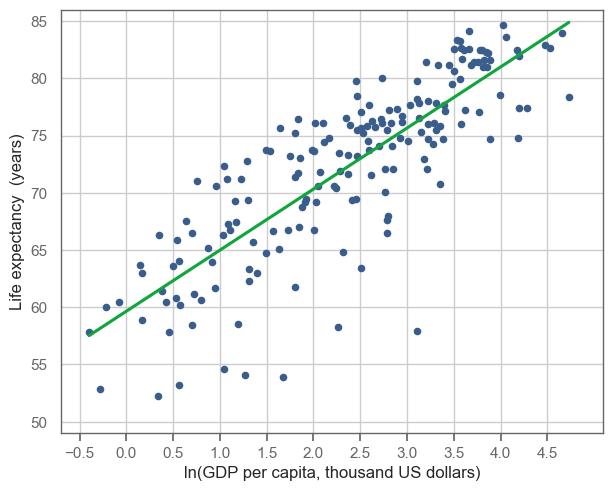

In [14]:
sns.regplot(data=xc, x="lngdppc", y="lifeexp",ci = False,line_kws=dict(color=da.color[1]),scatter_kws=dict(alpha = 1,s = 20))

plt.xlabel("ln(GDP per capita, thousand US dollars)", fontsize=12)
plt.ylabel("Life expectancy  (years)", fontsize=12)
plt.xlim(-0.7, 5.1)
plt.xticks(np.arange(-0.5, 5, 0.5))  
plt.ylim(49, 86)
plt.yticks(np.arange(50, 86, 5))  


plt.show()

(b) Life expectancy and ln(GDP per capita),
(labels are thousand dollars)

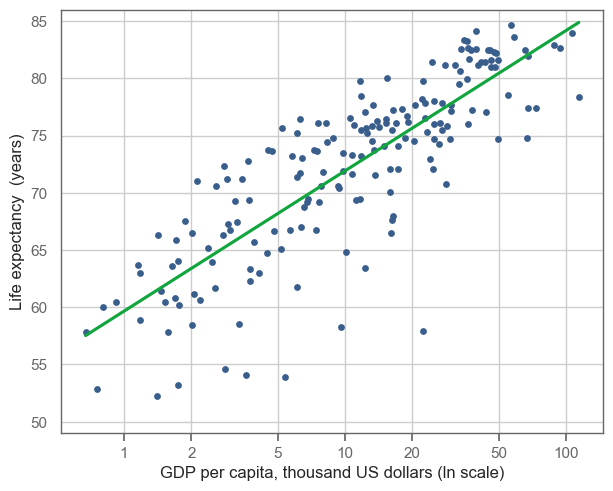

In [15]:
sns.regplot(data=xc, x="lngdppc", y="lifeexp",ci = False,line_kws=dict(color=da.color[1]),scatter_kws=dict(alpha = 1,s = 15))

plt.xlabel("GDP per capita, thousand US dollars (ln scale)", fontsize=12)
plt.ylabel("Life expectancy  (years)", fontsize=12)
xticks = [0, 0.7, 1.6, 2.3, 3, 3.9, 4.6]
xlabels = ["1", "2", "5", "10", "20", "50", "100"]
plt.xticks(ticks=xticks,labels=xlabels)
plt.ylim(49, 86)
plt.yticks(np.arange(50, 86, 5))  
plt.show()


### TOTAL GDP

Level-level regression

In [16]:
reg1 = smf.ols(formula="lifeexp ~ gdppc", data=xc)
reg1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeexp   R-squared:                       0.442
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                     142.4
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           1.47e-24
Time:                        12:10:27   Log-Likelihood:                -574.97
No. Observations:                 182   AIC:                             1154.
Df Residuals:                     180   BIC:                             1160.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     67.5137      0.585    115.478      0.000      66.360      68.667
gdppc          0.2493      0.021     11.933      0.000       0.208       0.291
==============================================================================
Omnibus:                       22.094   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.566
Skew:                          -0.925   Prob(JB):                     1.70e-06
Kurtosis:                       3.285   Cond. No.                         38.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Figure 8.6 Life expectancy and total GDP

(a) Life expectancy and total GDP

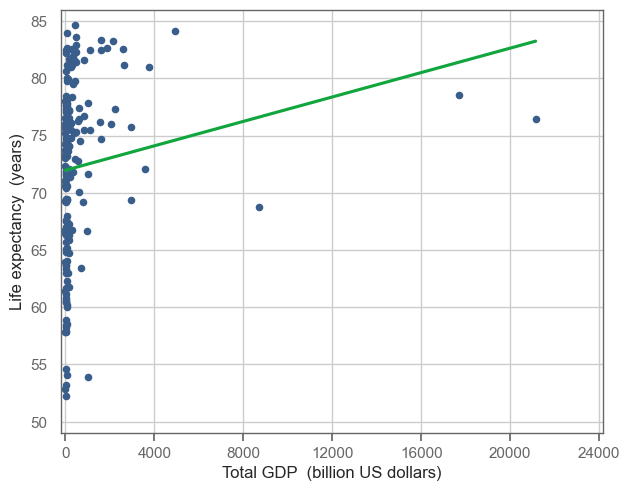

In [17]:
sns.regplot(data=xc, x="gdptot", y="lifeexp",ci = False,line_kws=dict(color=da.color[1]),scatter_kws=dict(alpha = 1,s = 20))

plt.xlabel("Total GDP  (billion US dollars)", fontsize=12)
plt.ylabel("Life expectancy  (years)", fontsize=12)
plt.xlim(-200, 24200)
plt.xticks(np.arange(0, 24001, 4000))  
plt.ylim(49, 86)
plt.yticks(np.arange(50, 86, 5))  


plt.show()

In [18]:
reg2 = smf.ols(formula="lifeexp ~ lngdptot", data=xc)
reg2.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeexp   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.135
Method:                 Least Squares   F-statistic:                     29.30
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           1.96e-07
Time:                        12:10:28   Log-Likelihood:                -614.29
No. Observations:                 182   AIC:                             1233.
Df Residuals:                     180   BIC:                             1239.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     66.6120      1.177     56.598      0.000      64.290      68.934
lngdptot       1.3089      0.242      5.413      0.000       0.832       1.786
==============================================================================
Omnibus:                       12.032   Durbin-Watson:                   1.929
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.170
Skew:                          -0.645   Prob(JB):                      0.00138
Kurtosis:                       2.732   Cond. No.                         11.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

(b) Life expectancy and ln total GDP

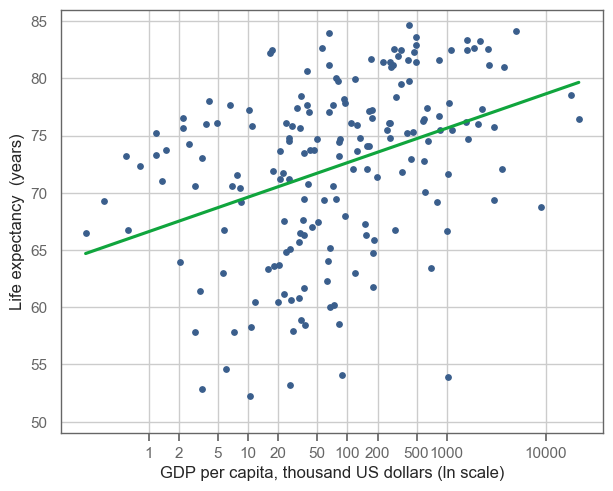

In [19]:
sns.regplot(data=xc, x="lngdptot", y="lifeexp",ci = False,line_kws=dict(color=da.color[1]),scatter_kws=dict(alpha = 1,s = 15))
plt.xlabel("GDP per capita, thousand US dollars (ln scale)", fontsize=12)
plt.ylabel("Life expectancy  (years)", fontsize=12)
xticks = [0, 0.7, 1.6, 2.3, 3, 3.9, 4.6,5.3, 6.2, 6.9, 9.2]
xlabels = ["1", "2", "5", "10", "20", "50", "100", "200", "500", "1000", "10000"]
plt.xticks(ticks=xticks,labels=xlabels)
plt.ylim(49, 86)
plt.yticks(np.arange(50, 86, 5))  
plt.show()


### GDP PER CAPITA PIECEWISE LINEAR SPLINE


In [20]:
cutoff = 50
cutoff_ln = np.log(cutoff)

In [21]:
from py_helper_functions import lspline

In [22]:
reg5 = smf.ols(formula="lifeexp ~ lspline(lngdppc,[cutoff_ln])", data=xc)
reg5.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeexp   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.683
Method:                 Least Squares   F-statistic:                     195.9
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           8.31e-46
Time:                        12:10:28   Log-Likelihood:                -522.47
No. Observations:                 182   AIC:                             1051.
Df Residuals:                     179   BIC:                             1061.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
====================================================================================================
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Intercept                           59.2872      0.743     79.767      0.000      57.821      60.754
lspline(lngdppc, [cutoff_ln])[0]     5.5526      0.294     18.868      0.000       4.972       6.133
lspline(lngdppc, [cutoff_ln])[1]    -0.2941      2.981     -0.099      0.922      -6.177       5.588
==============================================================================
Omnibus:                       43.162   Durbin-Watson:                   2.242
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               79.564
Skew:                          -1.154   Prob(JB):                     5.28e-18
Kurtosis:                       5.273   Cond. No.                         25.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
xc["e3"] = reg5.fit().resid
xc["sppred"] = reg5.fit().predict()


### Figure 8.7 Life expectancy and GDP per capita: scatterplot and nonlinear regression

(a) Piecewise linear spline

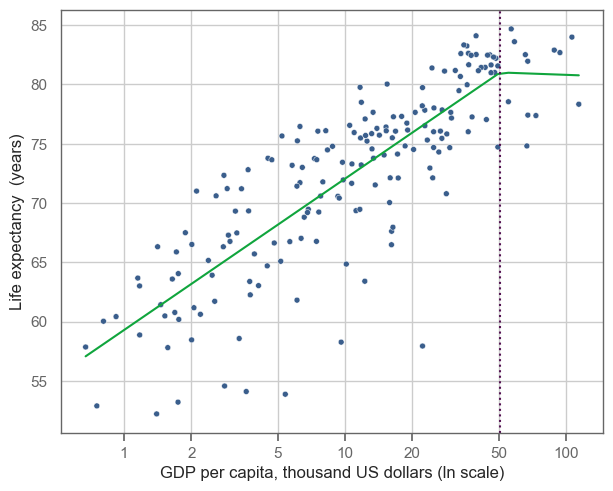

In [24]:
sns.scatterplot(
    data=xc,
    x="lngdppc",
    y="lifeexp",
    color=da.color[0],
    size=10
)

sns.lineplot(
    data=xc,
    x="lngdppc",
    y="sppred",
    color=da.color[1],
    linewidth=1.5
)

plt.axvline(
    x=np.log(cutoff),
    color=da.color[2],
    linewidth=1.5,
    linestyle="dotted"
)
plt.xlabel("GDP per capita, thousand US dollars (ln scale)", fontsize=12)
plt.ylabel("Life expectancy  (years)", fontsize=12)
xticks = [0, 0.7, 1.6, 2.3, 3, 3.9, 4.6]
xlabels = ["1", "2", "5", "10", "20", "50", "100"]
plt.xticks(ticks=xticks,labels=xlabels)
plt.legend().remove()
plt.show()

### QUADRATIC IN LEVEL-LOG REGRESSION

In [25]:
xc["lngdppc_sq"] = xc["lngdppc"].pow(2)
reg6 = smf.ols(formula="lifeexp ~ lngdppc+lngdppc_sq", data=xc)
reg6.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeexp   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     192.0
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           2.92e-45
Time:                        12:10:29   Log-Likelihood:                -523.75
No. Observations:                 182   AIC:                             1054.
Df Residuals:                     179   BIC:                             1063.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.9017      1.035     56.911      0.000      56.859      60.944
lngdppc        6.3038      0.988      6.380      0.000       4.354       8.254
lngdppc_sq    -0.2200      0.215     -1.022      0.308      -0.645       0.205
==============================================================================
Omnibus:                       43.067   Durbin-Watson:                   2.252
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.274
Skew:                          -1.168   Prob(JB):                     1.66e-17
Kurtosis:                       5.176   Cond. No.                         40.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
xc["e6"] = reg6.fit().resid

(b) Quadratic function

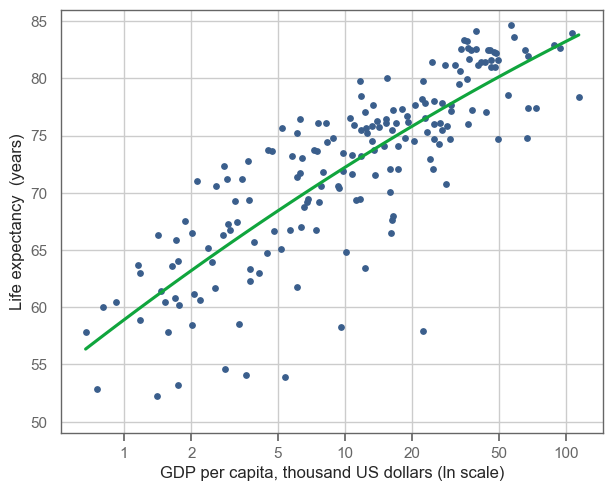

In [27]:
sns.regplot(data=xc, x="lngdppc", y="lifeexp",ci = False,order=2,line_kws=dict(color=da.color[1]),scatter_kws=dict(alpha = 1,s = 15))

plt.xlabel("GDP per capita, thousand US dollars (ln scale)", fontsize=12)
plt.ylabel("Life expectancy  (years)", fontsize=12)
xticks = [0, 0.7, 1.6, 2.3, 3, 3.9, 4.6]
xlabels = ["1", "2", "5", "10", "20", "50", "100"]
plt.xticks(ticks=xticks,labels=xlabels)
plt.ylim(49, 86)
plt.yticks(np.arange(50, 86, 5))  
plt.show()


### WEIGHTED AND UNWEIGHTED REGRESSION

In [28]:
reg7 = smf.ols(formula="lifeexp ~ lngdppc", data=xc)
reg7.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lifeexp   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.678
Method:                 Least Squares   F-statistic:                     382.8
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           2.00e-46
Time:                        12:10:30   Log-Likelihood:                -524.28
No. Observations:                 182   AIC:                             1053.
Df Residuals:                     180   BIC:                             1059.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.6593      0.722     82.628      0.000      58.235      61.084
lngdppc        5.3336      0.273     19.565      0.000       4.796       5.872
==============================================================================
Omnibus:                       40.029   Durbin-Watson:                   2.238
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               68.168
Skew:                          -1.116   Prob(JB):                     1.58e-15
Kurtosis:                       5.002   Cond. No.                         6.65
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [29]:
reg7 = smf.wls(formula="lifeexp ~ lngdppc", data=xc, weights=xc.population)
reg7.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:                lifeexp   R-squared:                       0.662
Model:                            WLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     351.9
Date:                Mon, 03 Mar 2025   Prob (F-statistic):           3.23e-44
Time:                        12:10:30   Log-Likelihood:                -659.24
No. Observations:                 182   AIC:                             1322.
Df Residuals:                     180   BIC:                             1329.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     58.7179      0.775     75.716      0.000      57.188      60.248
lngdppc        5.7529      0.307     18.760      0.000       5.148       6.358
==============================================================================
Omnibus:                      159.074   Durbin-Watson:                   2.114
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5085.737
Skew:                          -2.901   Prob(JB):                         0.00
Kurtosis:                      28.239   Cond. No.                         7.82
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Figure 8.9 Life expectancy and log GDP per capita: unweighted and weighted regressions

(a) Unweighted

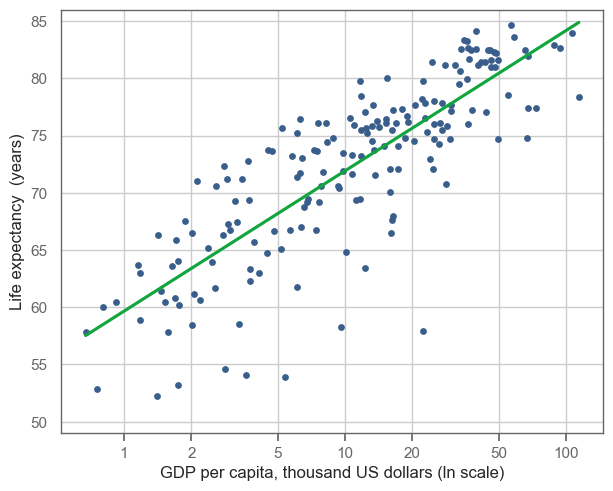

In [30]:
sns.regplot(data=xc, x="lngdppc", y="lifeexp",ci = False,line_kws=dict(color=da.color[1]),scatter_kws=dict(alpha = 1,s = 15))

plt.xlabel("GDP per capita, thousand US dollars (ln scale)", fontsize=12)
plt.ylabel("Life expectancy  (years)", fontsize=12)
xticks = [0, 0.7, 1.6, 2.3, 3, 3.9, 4.6]
xlabels = ["1", "2", "5", "10", "20", "50", "100"]
plt.xticks(ticks=xticks,labels=xlabels)
plt.ylim(49, 86)
plt.yticks(np.arange(50, 86, 5))  
plt.show()

(b) Weighted

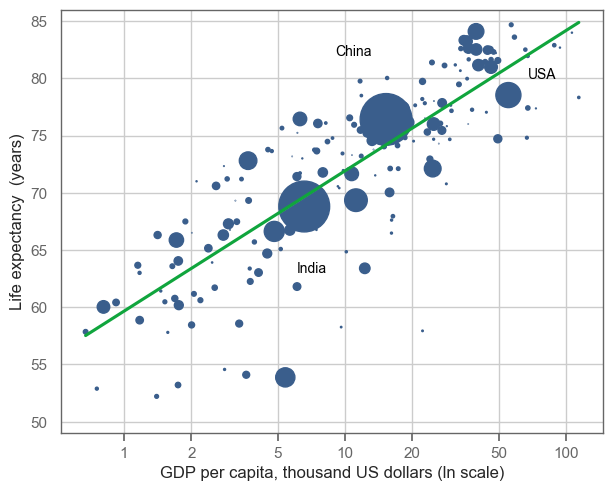

In [31]:
sns.regplot(data=xc, x="lngdppc", y="lifeexp",ci = False,line_kws=dict(color=da.color[1]),scatter_kws=dict(alpha = 1,s = xc["population"]))

plt.text(4.2, 80, "USA", fontsize=10)
plt.text(2.2, 82, "China", fontsize=10)
plt.text(1.8, 63, "India", fontsize=10)

plt.xlabel("GDP per capita, thousand US dollars (ln scale)", fontsize=12)
plt.ylabel("Life expectancy  (years)", fontsize=12)
xticks = [0, 0.7, 1.6, 2.3, 3, 3.9, 4.6]
xlabels = ["1", "2", "5", "10", "20", "50", "100"]
plt.xticks(ticks=xticks,labels=xlabels)
plt.ylim(49, 86)
plt.yticks(np.arange(50, 86, 5))  
plt.show()